In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv(r'D:\3 курс\5 сем\машинное обучение\Iris.csv')

print("Данные загружены")
print("Размер данных:", data.shape)

numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
print("Числовые атрибуты:", numeric_cols)

Данные загружены
Размер данных: (150, 6)
Числовые атрибуты: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [8]:
# 1. Описание датасета
print("ОПИСАНИЕ ДАТАСЕТА")
print("Предметная область: ботаника / классификация растений")
print("Источник данных: https://www.kaggle.com/datasets/uciml/iris")
print("Характер данных: реальные данные измерений цветков ириса")
print("")
print("Описание атрибутов:")
print("Id - идентификатор образца (целочисленный)")
print("SepalLengthCm - длина чашелистика в см (числовой, непрерывный)")
print("SepalWidthCm - ширина чашелистика в см (числовой, непрерывный)")
print("PetalLengthCm - длина лепестка в см (числовой, непрерывный)")
print("PetalWidthCm - ширина лепестка в см (числовой, непрерывный)")
print("Species - вид ириса (строковый, категориальный)")
print("")
print("Задача анализа: Классификация видов ириса по морфологическим характеристикам")
print("Целевая переменная: Species (вид растения)")
print("Основная цель: Построение модели классификации для автоматического определения вида ириса")
print("")
print("Контекст данных:")
print("- Данные собраны Рональдом Фишером в 1936 году")
print("- Содержит измерения 3 видов ириса: setosa, versicolor, virginica")
print("- Каждый вид представлен 50 образцами")
print("- Измерения включают размеры чашелистиков и лепестков")
print("")
print("Дополнительная информация:")
print("Количество видов:", data['Species'].nunique())
print("Виды:", list(data['Species'].unique()))
print("Общее количество записей:", len(data))

ОПИСАНИЕ ДАТАСЕТА
Предметная область: ботаника / классификация растений
Источник данных: https://www.kaggle.com/datasets/uciml/iris
Характер данных: реальные данные измерений цветков ириса

Описание атрибутов:
Id - идентификатор образца (целочисленный)
SepalLengthCm - длина чашелистика в см (числовой, непрерывный)
SepalWidthCm - ширина чашелистика в см (числовой, непрерывный)
PetalLengthCm - длина лепестка в см (числовой, непрерывный)
PetalWidthCm - ширина лепестка в см (числовой, непрерывный)
Species - вид ириса (строковый, категориальный)

Задача анализа: Классификация видов ириса по морфологическим характеристикам
Целевая переменная: Species (вид растения)
Основная цель: Построение модели классификации для автоматического определения вида ириса

Контекст данных:
- Данные собраны Рональдом Фишером в 1936 году
- Содержит измерения 3 видов ириса: setosa, versicolor, virginica
- Каждый вид представлен 50 образцами
- Измерения включают размеры чашелистиков и лепестков

Дополнительная инф

СТАТИСТИЧЕСКИЙ АНАЛИЗ АТРИБУТОВ:

SepalLengthCm
Среднее: 5.84
СКО: 0.83
Пропуски: 0
Медиана: 5.8
Минимум: 4.3
Максимум: 7.9

SepalWidthCm
Среднее: 3.05
СКО: 0.43
Пропуски: 0
Медиана: 3.0
Минимум: 2.0
Максимум: 4.4

PetalLengthCm
Среднее: 3.76
СКО: 1.76
Пропуски: 0
Медиана: 4.35
Минимум: 1.0
Максимум: 6.9

PetalWidthCm
Среднее: 1.2
СКО: 0.76
Пропуски: 0
Медиана: 1.3
Минимум: 0.1
Максимум: 2.5


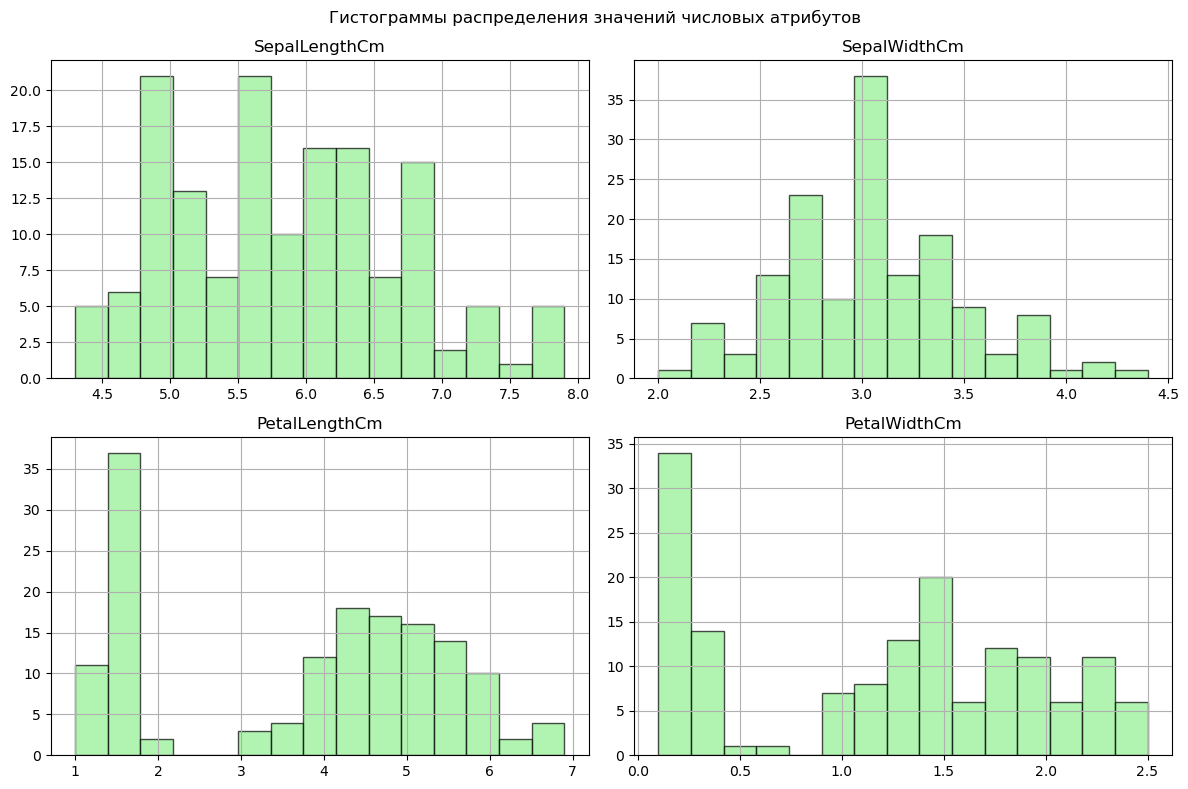

<Figure size 1200x600 with 0 Axes>

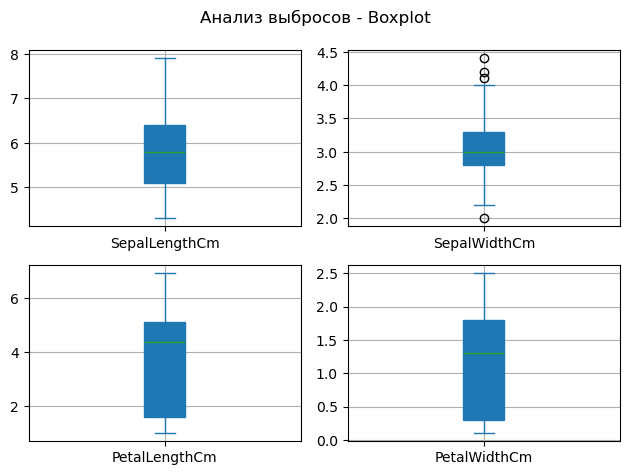


АНАЛИЗ ВЫБРОСОВ:
SepalLengthCm: 0 выбросов
SepalWidthCm: 4 выбросов
PetalLengthCm: 0 выбросов
PetalWidthCm: 0 выбросов

РЕКОМЕНДАЦИИ ПО ОБРАБОТКЕ:
Пропущенных значений нет - обработка не требуется
Выбросы минимальны и являются естественной вариацией данных
Рекомендуется сохранить все данные для анализа


In [12]:
# Удаляем столбец Id как неинформативный
data = data.drop('Id', axis=1)

# Анализ атрибутов
print("СТАТИСТИЧЕСКИЙ АНАЛИЗ АТРИБУТОВ:")
for col in numeric_cols:
    print(f"\n{col}")
    print("Среднее:", round(data[col].mean(), 2))
    print("СКО:", round(data[col].std(), 2))
    print("Пропуски:", data[col].isnull().sum())
    print("Медиана:", round(data[col].median(), 2))
    print("Минимум:", round(data[col].min(), 2))
    print("Максимум:", round(data[col].max(), 2))

# Гистограммы
data[numeric_cols].hist(bins=15, figsize=(12, 8), color='lightgreen', 
                       edgecolor='black', alpha=0.7)
plt.suptitle('Гистограммы распределения значений числовых атрибутов')
plt.tight_layout()
plt.show()

# Box plots для выбросов
plt.figure(figsize=(12, 6))
data[numeric_cols].plot(kind='box', subplots=True, layout=(2, 2), 
                       grid=True, patch_artist=True)
plt.suptitle('Анализ выбросов - Boxplot')
plt.tight_layout()
plt.show()

# Анализ выбросов
print("\nАНАЛИЗ ВЫБРОСОВ:")
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} выбросов")

print("\nРЕКОМЕНДАЦИИ ПО ОБРАБОТКЕ:")
print("Пропущенных значений нет - обработка не требуется")
print("Выбросы минимальны и являются естественной вариацией данных")
print("Рекомендуется сохранить все данные для анализа")

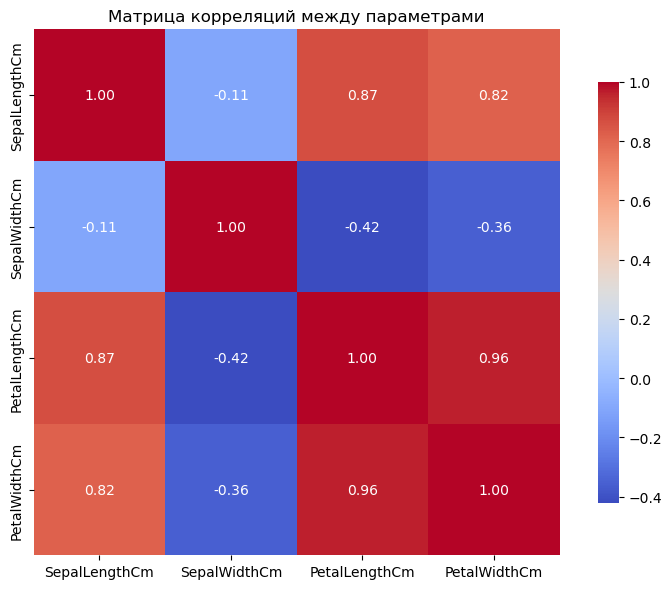

АНАЛИЗ КОРРЕЛЯЦИЙ:

ВЫСОКИЕ КОРРЕЛЯЦИИ (>0.7):
SepalLengthCm - PetalLengthCm: 0.872 (положительная)
SepalLengthCm - PetalWidthCm: 0.818 (положительная)
PetalLengthCm - PetalWidthCm: 0.963 (положительная)

СЛАБЫЕ КОРРЕЛЯЦИИ (<0.3):
SepalLengthCm - SepalWidthCm: -0.109


In [13]:
# Корреляционный анализ
corr_matrix = data[numeric_cols].corr()

# Матрица корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            square=True, cbar_kws={'shrink': 0.8})
plt.title('Матрица корреляций между параметрами')
plt.tight_layout()
plt.show()

# Анализ корреляций
print("АНАЛИЗ КОРРЕЛЯЦИЙ:")
print("\nВЫСОКИЕ КОРРЕЛЯЦИИ (>0.7):")
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
            if corr_val > 0:
                print(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]}: {corr_val:.3f} (положительная)")
            else:
                print(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]}: {corr_val:.3f} (отрицательная)")

if len(high_corr) == 0:
    print("Не обнаружено")

print("\nСЛАБЫЕ КОРРЕЛЯЦИИ (<0.3):")
low_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) < 0.3:
            low_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
            print(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]}: {corr_val:.3f}")

if len(low_corr) == 0:
    print("Не обнаружено")

МАТРИЦА ГРАФИКОВ РАССЕИВАНИЯ:


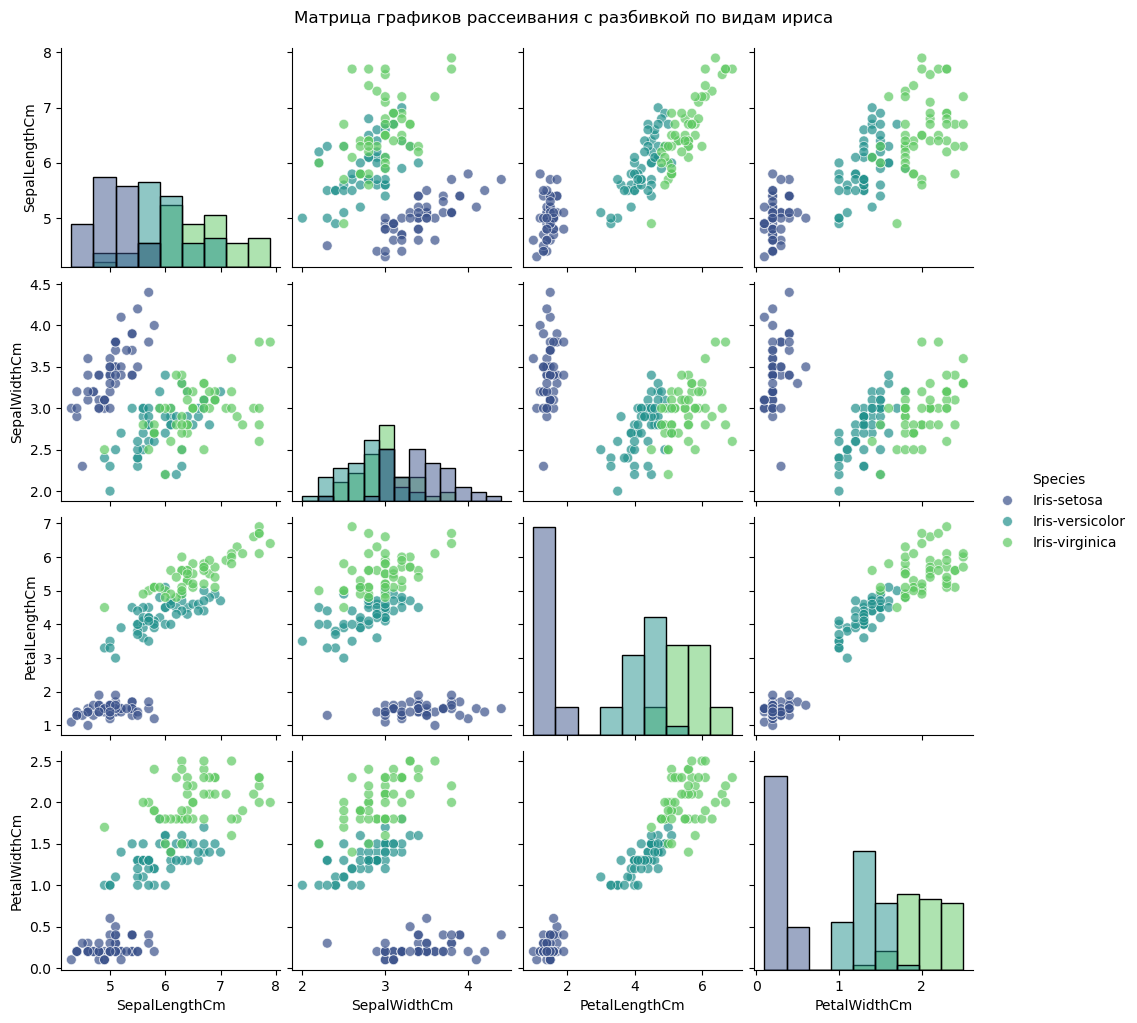


ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ - КОРРЕЛЯЦИИ ПО ВИДАМ:
Iris-setosa: корреляция длина/ширина лепестка = 0.306
Iris-versicolor: корреляция длина/ширина лепестка = 0.787
Iris-virginica: корреляция длина/ширина лепестка = 0.322


In [14]:
# Матрица графиков рассеивания с разбивкой по видам
print("МАТРИЦА ГРАФИКОВ РАССЕИВАНИЯ:")
sns.pairplot(data, hue='Species', diag_kind='hist', 
             palette='viridis', plot_kws={'alpha': 0.7, 's': 50})
plt.suptitle('Матрица графиков рассеивания с разбивкой по видам ириса', y=1.02)
plt.show()

# Дополнительный анализ - корреляции внутри видов
print("\nДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ - КОРРЕЛЯЦИИ ПО ВИДАМ:")
species_list = data['Species'].unique()
for species in species_list:
    species_data = data[data['Species'] == species][numeric_cols]
    petal_corr = species_data['PetalLengthCm'].corr(species_data['PetalWidthCm'])
    print(f"{species}: корреляция длина/ширина лепестка = {petal_corr:.3f}")
    

In [15]:
# Анализ результатов
print("\nАНАЛИЗ РЕЗУЛЬТАТОВ:")
print("1. Корреляционный анализ показал:")
print("   - Очень высокую положительную корреляцию между размерами лепестков (0.96)")
print("   - Сильную корреляцию между длиной лепестка и длиной чашелистика (0.87)")
print("   - Слабую отрицательную корреляцию между шириной и длиной чашелистика (-0.11)")

print("\n2. Визуальный анализ матрицы рассеивания показывает:")
print("   - Четкое разделение видов ириса в пространстве признаков")
print("   - Вид setosa хорошо отделим от остальных по всем параметрам")
print("   - Виды versicolor и virginica частично перекрываются")

print("\n3. Статистические характеристики:")
print("   - Все признаки имеют нормальное или близкое к нормальному распределение")
print("   - Выбросы практически отсутствуют")
print("   - Пропущенных значений нет")

print("\n4. Рекомендации для машинного обучения:")
print("   - Высокая корреляция между PetalLength и PetalWidth suggests feature selection")
print("   - Данные хорошо подходят для задач классификации")
print("   - Можно рассмотреть уменьшение размерности (PCA)")
print("   - Рекомендуемые алгоритмы: SVM, Random Forest, Logistic Regression")


АНАЛИЗ РЕЗУЛЬТАТОВ:
1. Корреляционный анализ показал:
   - Очень высокую положительную корреляцию между размерами лепестков (0.96)
   - Сильную корреляцию между длиной лепестка и длиной чашелистика (0.87)
   - Слабую отрицательную корреляцию между шириной и длиной чашелистика (-0.11)

2. Визуальный анализ матрицы рассеивания показывает:
   - Четкое разделение видов ириса в пространстве признаков
   - Вид setosa хорошо отделим от остальных по всем параметрам
   - Виды versicolor и virginica частично перекрываются

3. Статистические характеристики:
   - Все признаки имеют нормальное или близкое к нормальному распределение
   - Выбросы практически отсутствуют
   - Пропущенных значений нет

4. Рекомендации для машинного обучения:
   - Высокая корреляция между PetalLength и PetalWidth suggests feature selection
   - Данные хорошо подходят для задач классификации
   - Можно рассмотреть уменьшение размерности (PCA)
   - Рекомендуемые алгоритмы: SVM, Random Forest, Logistic Regression


In [16]:
print("\nОБЩИЕ ВЫВОДЫ:")
print("1. Датасет Iris является классическим и хорошо структурированным набором данных")
print("2. Признаки демонстрируют различную степень корреляции:")
print("   - Размеры лепестков сильно взаимосвязаны")
print("   - Размеры чашелистиков практически независимы")
print("3. Виды ириса хорошо разделяются по морфологическим признакам")
print("4. Данные готовы для использования в алгоритмах машинного обучения")
print("5. Набор идеально подходит для демонстрации работы алгоритмов классификации и кластеризации")


ОБЩИЕ ВЫВОДЫ:
1. Датасет Iris является классическим и хорошо структурированным набором данных
2. Признаки демонстрируют различную степень корреляции:
   - Размеры лепестков сильно взаимосвязаны
   - Размеры чашелистиков практически независимы
3. Виды ириса хорошо разделяются по морфологическим признакам
4. Данные готовы для использования в алгоритмах машинного обучения
5. Набор идеально подходит для демонстрации работы алгоритмов классификации и кластеризации
